# Problem Statement - 08
# Patient Health Monitoring


Sample Data:
    PatientID        Name  Age        Date  HeartRate   BP  Temperature  \
0          1  Sita Kumar   56  2024-01-29         74  150         97.4   
1          1  Sita Kumar   56  2024-01-12         83  113        100.7   
2          1  Sita Kumar   56  2024-01-04         83  119         98.0   
3          1  Sita Kumar   56  2024-01-15        117  111         98.1   
4          1  Sita Kumar   56  2024-01-29        108  148         98.1   

  RiskLevel  
0       Low  
1    Medium  
2       Low  
3       Low  
4      High  

Null values:
 PatientID      0
Name           0
Age            0
Date           0
HeartRate      0
BP             0
Temperature    0
RiskLevel      0
dtype: int64


C:\Users\rk811\AppData\Local\Temp\ipykernel_17948\3296638211.py:47: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\rk811\AppData\Local\Temp\ipykernel_17948\3296638211.py:50: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

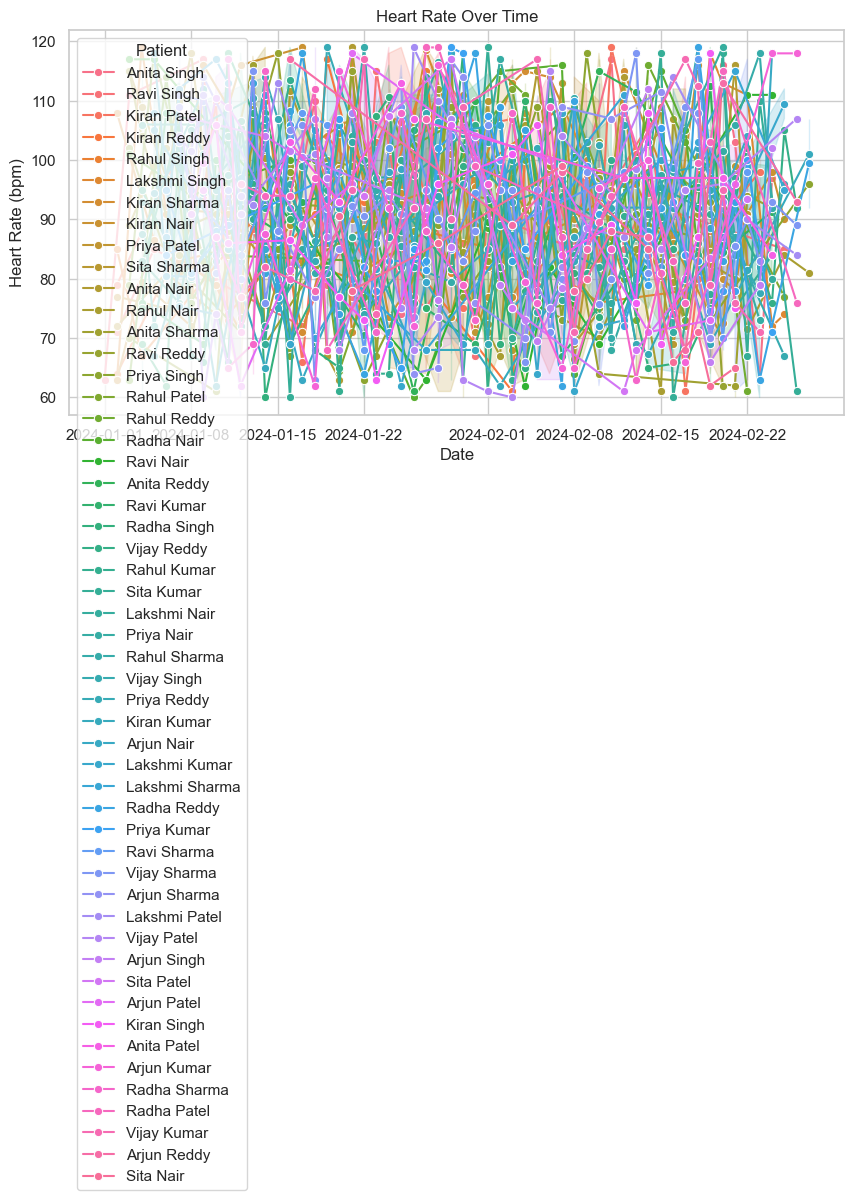

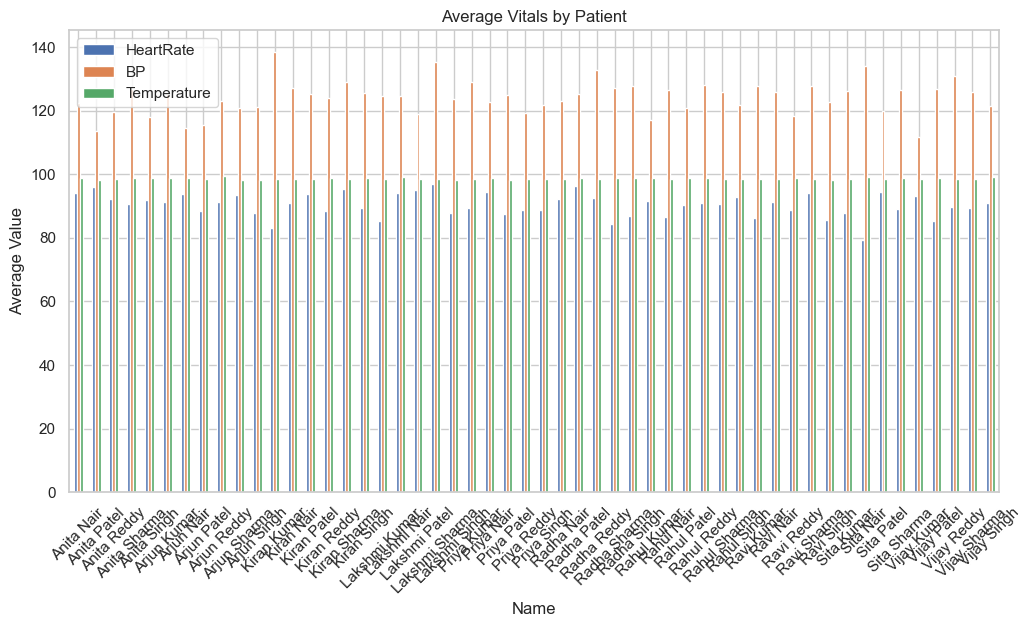

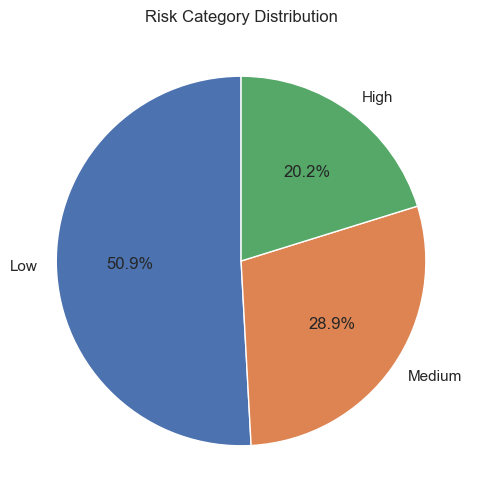


High-Risk Patients:
      PatientID           Name  Age  HeartRate   BP  Temperature RiskLevel
900          91     Ravi Singh   34         71  131         98.4      High
580          59    Rahul Singh   19         85  102         97.5      High
1371        138  Lakshmi Singh   52        119  142         99.2      High
80            9     Ravi Kumar   62         75  113         98.9      High
212          22   Anita Sharma   69        104  114         98.0      High
...         ...            ...  ...        ...  ...          ...       ...
47            5    Vijay Singh   76         67  125         98.4      High
569          57    Vijay Reddy   71        105  150         97.8      High
737          74    Arjun Reddy   72         93  102         99.7      High
339          34     Sita Kumar   18         61  159         97.9      High
1238        124    Priya Singh   31         96  121         98.2      High

[303 rows x 7 columns]


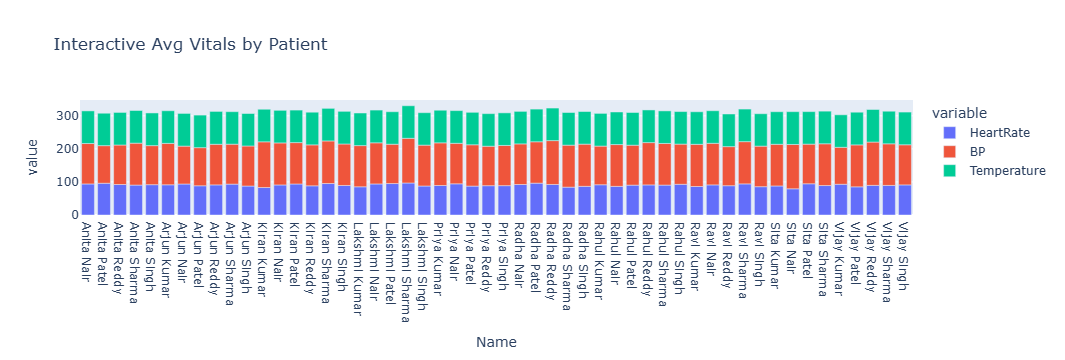


Summary Statistics:
         PatientID          Age                           Date    HeartRate  \
count  1500.000000  1500.000000                           1500  1500.000000   
mean     75.500000    49.653333  2024-01-29 15:23:31.200000256    90.460000   
min       1.000000    18.000000            2024-01-01 00:00:00    60.000000   
25%      38.000000    34.000000            2024-01-17 00:00:00    77.000000   
50%      75.500000    51.000000            2024-01-29 00:00:00    91.000000   
75%     113.000000    66.000000            2024-02-11 00:00:00   105.000000   
max     150.000000    79.000000            2024-02-27 00:00:00   119.000000   
std      43.314749    18.035613                            NaN    16.883753   

                BP  Temperature  
count  1500.000000  1500.000000  
mean    124.220000    98.625600  
min      90.000000    95.700000  
25%     106.000000    98.000000  
50%     124.000000    98.600000  
75%     143.000000    99.300000  
max     159.000000   101.8000

In [2]:
# Problem Statement- 08
# patient Health Monitoring 

# 1. Problem Understanding

"""
Objective:
Create a dashboard to track patient vital signs and health trends.

Expected Outcome:
• Line: Heart rate over time
• Bar: Avg. vitals by patient
• Pie: Risk category distribution
• Highlight: High-risk patients
"""


# 2. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set style
sns.set(style="whitegrid")


# 3. Data Input Handling

# Load the patient dataset
# Replace 'patients.csv' with your dataset filename
df = pd.read_csv("patients.csv")

# Show first 5 rows
print("Sample Data:\n", df.head())


# 4. Data Cleaning & Preprocessing

# Check for null values
print("\nNull values:\n", df.isnull().sum())

# Fill missing numeric values with mean
num_cols = ['HeartRate', 'BP', 'Temperature']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values with mode
df['RiskLevel'].fillna(df['RiskLevel'].mode()[0], inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort data by Date
df.sort_values(by="Date", inplace=True)


# 5. Analysis & Visualization


# Line Chart: Heart Rate Over Time
plt.figure(figsize=(10,5))
sns.lineplot(x="Date", y="HeartRate", hue="Name", data=df, marker="o")
plt.title("Heart Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Heart Rate (bpm)")
plt.legend(title="Patient")
plt.show()

# Bar Chart: Average Vitals by Patient
avg_vitals = df.groupby("Name")[["HeartRate","BP","Temperature"]].mean().reset_index()

avg_vitals.plot(x="Name", kind="bar", figsize=(12,6))
plt.title("Average Vitals by Patient")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()

# Pie Chart: Risk Category Distribution
risk_counts = df["RiskLevel"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(risk_counts, labels=risk_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Risk Category Distribution")
plt.show()

# Highlight High-Risk Patients
high_risk = df[df["RiskLevel"] == "High"]
print("\nHigh-Risk Patients:")
print(high_risk[["PatientID","Name","Age","HeartRate","BP","Temperature","RiskLevel"]])

# Optional interactive bar chart (Plotly)
fig = px.bar(avg_vitals, x="Name", y=["HeartRate","BP","Temperature"],
             title="Interactive Avg Vitals by Patient")
fig.show()


# 6. Output Accuracy & Clarity

print("\nSummary Statistics:")
print(df.describe())


# 7. Code Structure & Comments

# (Already followed throughout)


# 8. Final Report/Presentation

print("\nDashboard complete! Charts and tables generated.")
